0. Set Up

In [2]:

!git clone --branch feature/002-rotation https://github.com/antonfrancois/Demeter_metamorphosis.git

Cloning into 'Demeter_metamorphosis'...
remote: Enumerating objects: 6222, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 6222 (delta 32), reused 44 (delta 23), pack-reused 6152 (from 2)
Receiving objects: 100% (6222/6222), 641.31 MiB | 16.31 MiB/s, done.
Resolving deltas: 100% (4062/4062), done.
Updating files: 100% (180/180), done.


In [9]:
!git stash
!git pull origin feature/002-rotation

No local changes to save
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 35 (delta 27), reused 35 (delta 27), pack-reused 0 (from 0)
Unpacking objects: 100% (35/35), 481.57 KiB | 4.67 MiB/s, done.
From https://github.com/antonfrancois/Demeter_metamorphosis
 * branch            feature/002-rotation -> FETCH_HEAD
   62d20da..73366a0  feature/002-rotation -> origin/feature/002-rotation
Updating 62d20da..73366a0
Fast-forward
 examples/1_registration/lddmm_along_rigid.py       | 155 ++++-
 .../1_registration/lddmm_along_rigid_square.ipynb  | 710 +++++++++++++++++++++
 examples/1_registration/meta_along_rigid_2d.py     |   7 +-
 examples/4_visualisation/visualiseGeodesicOptim.py |   2 +-
 src/demeter/metamorphosis/data_cost.py             |  15 +-
 src/demeter/metamorphosis/rotate.py                |  18 +-
 src/demeter/metamorphosis/wraps.py                 |  10 +-
 src/demeter/utils/toolbox.p

Install packages, (needs to be executed twice because of a bug in pip. exucute, restart the kernel and re-execute this cell)

In [1]:
import subprocess
import sys, os

cwd = subprocess.check_output("pwd", text=True).strip()
if not "Demeter" in cwd:
	%cd Demeter_metamorphosis/

!pip install pynrrd
!pip install -U ipywidgets
print("\nInstalation of demeter from pip")
!pip install -e .
# !pip install -e .
!pip install simpleitk
!pip install itk

repo_path = os.path.abspath('.')
# repo_path = "/content/Demeter_metamorphosis/"
if repo_path not in sys.path:
	sys.path.insert(0, repo_path)
print(sys.path)


/content/Demeter_metamorphosis

Instalation of demeter from pip
Obtaining file:///content/Demeter_metamorphosis
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for demeter_metamorphosis (pyproject.toml) ... done
  Created wheel for demeter_metamorphosis: filename=demeter_metamorphosis-0.2.11-0.editable-py3-none-any.whl size=4322 sha256=c0a6daa6d8c2e56bfe8ebdf955f0178308403de11b2b6a97934ffedf59846472
  Stored in directory: /tmp/pip-ephem-wheel-cache-w1tm395j/wheels/b0/6a/69/c66c8a74253f8baa35c990caf2c48f3d36ded6d5a7d58f0e62
Successfully built demeter_metamorphosis
  Attempting uninstall: demeter_metamorphosis
    Found existing installation: demeter_metamorphosis 0.2.11
    Uninstalling demeter_metamorphosis-0.2.11:
      Successfully uninstalled demeter_metamorphosis-0.2.11
  Using cached simpleitk-2.5.2-cp31

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from google.colab import output
# output.enable_custom_widget_manager()

## 0.2 After jupyter restart, run:

In [24]:
# %matplotlib widget

import sys
import os


# Remplace par le chemin relatif où se trouve le package 'demeter'
# Exemple : si ton notebook est dans le dossier root du repo, et demeter est un sous-dossier
import subprocess
cwd = subprocess.check_output("pwd", text=True).strip()
if not "Demeter" in cwd:
	%cd Demeter_metamorphosis/

# repo_path = os.path.abspath('.')
repo_path = "/content/Demeter_metamorphosis/"
if repo_path not in sys.path:
	sys.path.insert(0, repo_path)
print(sys.path)



['/content/Demeter_metamorphosis/src', '/content/Demeter_metamorphosis/', '/content', '/env/python', '/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/usr/local/lib/python3.12/dist-packages', '/content/Demeter_metamorphosis/src', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.12/dist-packages/IPython/extensions', '/root/.ipython', '/tmp/tmp0anqi7v1']


# 1. Code utile

In [31]:
import os
# import nibabel as nib
# import numpy as np
import torch
# from torch.cuda import OutOfMemoryError, device
#
import demeter.utils.torchbox as tb
# import demeter.utils.axes3dsliders_plt as a3s
import demeter.utils.rigid_exploration as rg
# ## Faire Recalage Rigid + Meta
import demeter.utils.reproducing_kernels as rk
import matplotlib.pyplot as plt
#
# %load_ext autoreload
# %autoreload 2
import demeter.metamorphosis as mt
import demeter.metamorphosis.rotate as mtrt


# from nibabel.processing import resample_from_to
#
#
# import subprocess
# from execute_ixi_template import *
# cwd = subprocess.check_output("pwd", text=True).strip()

import examples.execute_ixi_template as eit

## Open images

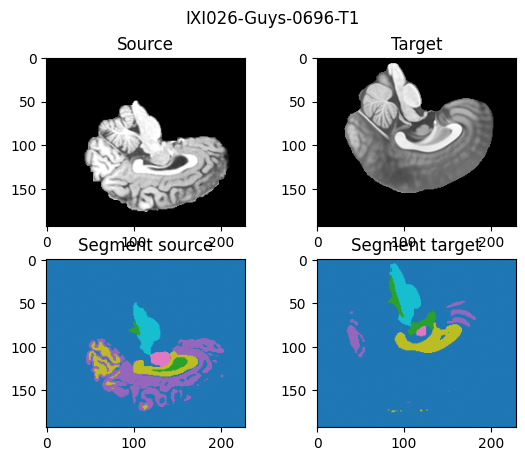

IXI026-Guys-0696-T1 image size : torch.Size([1, 1, 193, 229, 193])


In [32]:
import subprocess
cwd = subprocess.check_output("pwd", text=True).strip()
if "content" in cwd:
    template_folder = "/content/drive/MyDrive/demeter_data/ixi-T1/"
    ixi_folder = "/content/drive/MyDrive/demeter_data/ixi-T1/"
    template_seg_path = ""
    location = "colab"
    result_folder = "/content/drive/MyDrive/demeter_data/ixi_results/"
elif "gpfs" in cwd:
    template_folder = "/gpfs/workdir/francoisa/data/templates/mni_icbm152_nlin_asym_09c_nifti/mni_icbm152_nlin_asym_09c"
    ixi_folder = "/gpfs/workdir/francoisa/data/IXI-T1_fastsurfer/"
    template_seg_path = "fastsurfer_seg/mri/"
    result_folder = "/gpfs/workdir/francoisa/data/IXI_results/"
    location = 'meso'
    # OPTIM_SAVE_DIR = "/gpfs/workdir/francoisa/saved_optim/"
else:
    template_folder ="/home/turtlefox/Documents/11_metamorphoses/data/templates/mni_icbm152_nlin_asym_09c_nifti/mni_icbm152_nlin_asym_09c"
    ixi_folder = "/home/turtlefox/Documents/11_metamorphoses/data/IXI-T1_fastsurfer"
    template_seg_path = "fastsurfer_seg/mri/"
    result_folder = "/home/turtlefox/Documents/11_metamorphoses/data/IXI_results/"
    location = 'local'
device = "cuda:0"

pp = eit.IXIToTemplatePreprocessor(
    ixi_root=ixi_folder,
    template_root=template_folder,
    template_seg_path=template_seg_path,
    do_plot=True,
)

subjects_numbers = [26]#, 28, 26, 50,2, 12]
RECOMPUTE = False
RESIZE_FACTOR = 1 if location == 'colab' else .3

# init_csv(result_folder)

if location == "meso": # don't touch this line
    file_db = "ixi_results_tests.db"
else: # here you can sandbox what you need to do.
    # file_db = "ixi_results.db"
    file_db = "ixi_results_meso_20250917.db"
db_path = os.path.join(result_folder, file_db)

subject_name, source, target, seg_source, seg_target = pp.get_subjects_aligned(numbers=subjects_numbers, resize_factor=RESIZE_FACTOR, first_only=True)
print(subject_name, 'image size :', source.shape)

## Recherche rigide


S compute barycentre : tensor([-0.0286,  0.0464,  0.2288])
T compute barycentre : tensor([-0.0024, -0.0352, -0.0858])
diff :  tensor([ 0.0262, -0.0816, -0.3146])


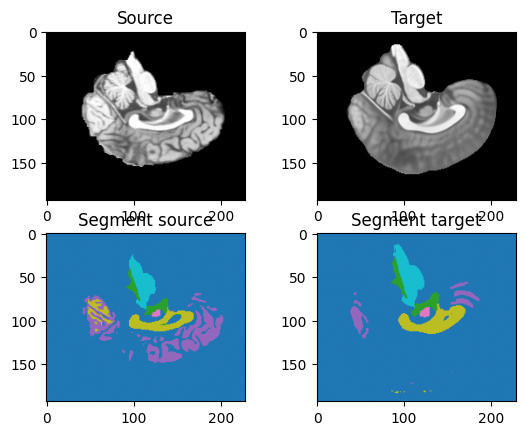

	  dice val 1.0 : 0.48438841104507446
	  dice val 2.0 : 0.30819618701934814
	  dice val 3.0 : 0.6026743054389954
	  dice val 4.0 : 0.5076223015785217
	  dice val 5.0 : 0.6171814203262329
	  dice average : 0.5040124654769897


{' dice val 1.0': tensor(0.4844),
 ' dice val 2.0': tensor(0.3082),
 ' dice val 3.0': tensor(0.6027),
 ' dice val 4.0': tensor(0.5076),
 ' dice val 5.0': tensor(0.6172),
 ' dice average': tensor(0.5040)}

In [33]:
# Recherche rigide
source_b, target_b, trans_s, trans_t = rg.align_barycentres(source, target, verbose=True)
id_grid = tb.make_regular_grid(source_b.shape[2:],dx_convention="2square")
seg_target_b = tb.imgDeform(seg_target, (id_grid + trans_t), mode="nearest")
seg_source_b = tb.imgDeform(seg_source, (id_grid + trans_s), mode="nearest")

w = source.shape[-1]//2
fig, ax = plt.subplots(2,2)
ax[0,0].imshow(source_b[0,0,..., w], cmap="gray")
ax[0,0].set_title("Source")

ax[0,1].imshow(target_b[0,0,..., w], cmap="gray")
ax[0,1].set_title("Target")

ax[1,0].imshow(seg_source_b[0,0,..., w], cmap="tab10", vmin= seg_source.min(), vmax= seg_source.max())
ax[1,0].set_title("Segment source")
ax[1,1].imshow(seg_target_b[0,0,..., w], cmap="tab10", vmin= seg_source.min(), vmax= seg_source.max())
ax[1,1].set_title("Segment target")


plt.show()
tb.average_dice(seg_target_b, seg_source_b, verbose=True)

In [5]:
kernelOperator = rk.DummyKernel()
datacost = mt.Rotation_Ssd_Cost(target_b.to('cuda:0'), gamma=1)
# datacost = mt.Rotation_MutualInformation_Cost(target_b.to('cuda:0'), alpha=1)


mr = mt.rigid_along_metamorphosis(
    source_b, target_b, momenta_ini=0,
    kernelOperator= kernelOperator,
    rho = 1,
    data_term=datacost ,
    integration_steps = 10,
    cost_cst=.1,
)
top_params = rg.initial_exploration(mr,r_step=10, max_output = 15, verbose=True)
print(top_params)

[Tensor.rigid_along_metamorphosis] 
	Max Allocated: 32.54 MB | Max Reserved: 34.00 MB
Init search : 1 / 50
rot prior : tensor([-3.1416,  0.0000,  0.0000]) 1
dict_keys(['momentum_R', 'momentum_S'])


The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4421.)


	 (tensor(262978.1250), {'rot_prior': tensor([-3.1416,  0.0000,  0.0000]), 'trans_prior': None, 'scale_prior': None})
Init search : 2 / 50
rot prior : tensor([-3.1416,  0.7854,  0.0000]) 1
dict_keys(['momentum_R', 'momentum_S'])
	 (tensor(263501.7500), {'rot_prior': tensor([-3.1416,  0.7854,  0.0000]), 'trans_prior': None, 'scale_prior': None})
Init search : 3 / 50
rot prior : tensor([-3.1416,  1.5708,  0.0000]) 1
dict_keys(['momentum_R', 'momentum_S'])
	 (tensor(251877.1250), {'rot_prior': tensor([-3.1416,  1.5708,  0.0000]), 'trans_prior': None, 'scale_prior': None})
Init search : 4 / 50
rot prior : tensor([-3.1416,  2.3562,  0.0000]) 1
dict_keys(['momentum_R', 'momentum_S'])
	 (tensor(254466.4844), {'rot_prior': tensor([-3.1416,  2.3562,  0.0000]), 'trans_prior': None, 'scale_prior': None})
Init search : 5 / 50
rot prior : tensor([-3.1416,  3.1416,  0.0000]) 1
dict_keys(['momentum_R', 'momentum_S'])
	 (tensor(270381.1562), {'rot_prior': tensor([-3.1416,  3.1416,  0.0000]), 'trans_pr

In [6]:
best_loss, best_momenta, best_rot = rg.optimize_on_rigid(mr, top_params, n_iter=10,verbose=True)


>>>>>>>>>>
0/15 Optimize wit params {'rot_prior': tensor([0.3491, 0.0000, 0.0000]), 'trans_prior': None, 'scale_prior': None}
rot prior : tensor([0.3491, 0.0000, 0.0000]) 1
momenta type <class 'dict'>
Rotation_Ssd_Cost, iter : 0: gamma = 1
		data_loss : tensor(227363.1719, device='cuda:0')
		norm_v_2 : tensor([0], device='cuda:0')
		norm_l2_on_z : tensor([0], device='cuda:0')
		norm_l2_on_R : tensor(0.1218, device='cuda:0')
		norm_S_2 : tensor(0., device='cuda:0')
Rotation_Ssd_Cost, iter : 1: gamma = 1
Rotation_Ssd_Cost, iter : 1: gamma = 1
Rotation_Ssd_Cost, iter : 1: gamma = 1
Rotation_Ssd_Cost, iter : 1: gamma = 1
Rotation_Ssd_Cost, iter : 1: gamma = 1
Rotation_Ssd_Cost, iter : 1: gamma = 1
Rotation_Ssd_Cost, iter : 1: gamma = 1
Rotation_Ssd_Cost, iter : 1: gamma = 1
Rotation_Ssd_Cost, iter : 1: gamma = 1
Rotation_Ssd_Cost, iter : 1: gamma = 1
Rotation_Ssd_Cost, iter : 1: gamma = 1
Rotation_Ssd_Cost, iter : 1: gamma = 1
Rotation_Ssd_Cost, iter : 1: gamma = 1
Rotation_Ssd_Cost, iter 

In [34]:
best_momenta = {'rot_prior': torch.tensor([[ 0.0000, -0.0369,  0.0008],
        [ 0.0369,  0.0000,  0.0813],
        [-0.0008, -0.0813,  0.0000]]),
                'trans_prior': torch.tensor([ 0.0011, -0.0064, -0.0058]),
                'scale_prior': torch.tensor([0.1486, 0.0935, 0.1975])}


## Check rigid search

rot prior : tensor([[ 0.0000, -0.0369,  0.0008],
        [ 0.0369,  0.0000,  0.0813],
        [-0.0008, -0.0813,  0.0000]]) 2
[Tensor.rigid_along_metamorphosis] 
	Max Allocated: 82.30 MB | Max Reserved: 21910.00 MB
Estimated affines values:
	 rotation matrix : tensor([[ 9.9932e-01, -3.6890e-02, -7.0045e-04],
        [ 3.6825e-02,  9.9602e-01,  8.1221e-02],
        [-2.2986e-03, -8.1192e-02,  9.9670e-01]], grad_fn=<MmBackward0>)
	 translation : tensor([ 0.0012, -0.0067, -0.0063], grad_fn=<AddBackward0>)
	 scaling : tensor([1.1588, 1.0975, 1.2156], grad_fn=<MulBackward0>)
	 (rotation only) dice val 1.0 : 0.7210298776626587
	 (rotation only) dice val 2.0 : 0.5533291697502136
	 (rotation only) dice val 3.0 : 0.8543019890785217
	 (rotation only) dice val 4.0 : 0.6753091812133789
	 (rotation only) dice val 5.0 : 0.8891376256942749
	 (rotation only) dice average : 0.7386215329170227
Rigid dice : {'(rotation only) dice val 1.0': tensor(0.7210), '(rotation only) dice val 2.0': tensor(0.5533), '

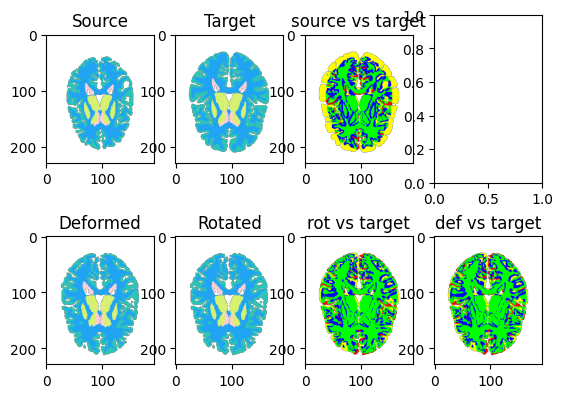

rigid_dice: {'(rotation only) dice val 1.0': tensor(0.7210), '(rotation only) dice val 2.0': tensor(0.5533), '(rotation only) dice val 3.0': tensor(0.8543), '(rotation only) dice val 4.0': tensor(0.6753), '(rotation only) dice val 5.0': tensor(0.8891), '(rotation only) dice average': tensor(0.7386)}
reg_dice: {'(all) dice val 1.0': tensor(0.7210), '(all) dice val 2.0': tensor(0.5533), '(all) dice val 3.0': tensor(0.8543), '(all) dice val 4.0': tensor(0.6753), '(all) dice val 5.0': tensor(0.8891), '(all) dice average': tensor(0.7386)}


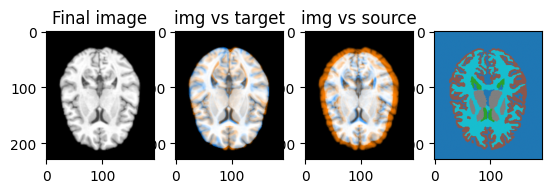

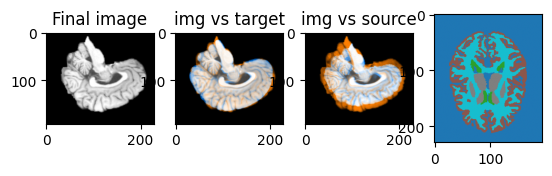

In [35]:
kernelOperator = rk.DummyKernel()
momenta = mtrt.prepare_momenta(
    # mr.source.shape,
    source_b.shape,
    diffeo=False,
    rotation=True,
    translation=True,
    scaling=True,
    device= "cpu",
    **best_momenta
)
# print(momenta["momentum_R"])
# print(momenta["momentum_T"])
datacost = mt.Rotation_Ssd_Cost(target_b.to('cuda:0'), gamma=1)
# datacost = mt.Rotation_Cost(target_b, mt.Mutual_Information, alpha=.5)
mr = mt.rigid_along_metamorphosis(
    source_b, target_b, momenta_ini=momenta,
    kernelOperator= kernelOperator,
    rho = 1,
    data_term=datacost ,
    integration_steps = 10,
    cost_cst=.1,
    n_iter=0,
    save_gpu_memory=False,
    lbfgs_max_iter = 20,
    lbfgs_history_size = 20,
)
mr.mp.forward(source_b.cpu(), momenta, save=True)

# mr.id_grid = mr.mp.id_grid
# mr.parameter = momenta
# mr.cost(momenta)
print('Estimated affines values:')
print("\t rotation matrix :", mr.mp.rot_mat)
print("\t translation :", mr.mp.translation)
print("\t scaling :", mr.mp.scale)

(rigid_dice, reg_dice), (rotated_source_segs, deformed_source_segs) = mr.compute_DICE(seg_source_b, seg_target_b)
print("rigid_dice:", rigid_dice)
print("reg_dice:", reg_dice)

# Hack un peu sale
# mr.to_analyse = (momenta, torch.zeros((4,1)))
# mr.save(f"{name}_ixibrain_rigidscalingonly",
        # save_path="/content/drive/MyDrive/demeter_data/demeter_optim/"
        # )


# a3s.Visualize_GeodesicOptim_plt(mr, "random")
rot_def = tb.grid_from_rotation_translation(mr.mp.id_grid, mr.mp.rot_mat, mr.mp.translation)
rot_def =   tb.grid_from_rotation(mr.mp.id_grid, mr.mp.rot_mat.T)
rot_def += mr.mp.translation
rot_def = mr.mp.get_rigidor()
rotated_source = tb.imgDeform(mr.mp.image,rot_def,dx_convention='2square')

img = rotated_source[0,0, mr.source.shape[-3]//2 -4].detach().cpu()
img_target = tb.imCmp(rotated_source[:,:, source.shape[-3]//2 -4].detach().cpu(), mr.target[:,:, source.shape[-3]//2 -4].detach().cpu(), "compose")[0]
img_source = tb.imCmp(rotated_source[:,:, source.shape[-3]//2 -4].detach().cpu(), mr.source[:,:, source.shape[-3]//2 -4].detach().cpu(), "compose")[0]

fig,ax = plt.subplots(1,4)
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Final image")
ax[1].imshow(img_target, cmap="gray")
ax[1].set_title("img vs target")
ax[2].imshow(img_source, cmap="gray")
ax[2].set_title("img vs source")
ax[3].imshow(rotated_source_segs.detach()[0,0,  source.shape[-3]//2],
             cmap="tab10",
             # vmin=rotated_source.min(),
             # vmax=rotated_source.max()
             )

img = rotated_source[0,0, :,:,mr.source.shape[-1]//2 -4].detach().cpu()
img_target = tb.imCmp(rotated_source[:,:,  :,:,source.shape[-1]//2 -4].detach().cpu(), mr.target[:,:, :,:, source.shape[-1]//2 -4].detach().cpu(), "compose")[0]
img_source = tb.imCmp(rotated_source[:,:, :,:, source.shape[-1]//2 -4].detach().cpu(), mr.source[:,:, :,:, source.shape[-1]//2 -4].detach().cpu(), "compose")[0]

fig,ax = plt.subplots(1,4)
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Final image")
ax[1].imshow(img_target, cmap="gray")
ax[1].set_title("img vs target")
ax[2].imshow(img_source, cmap="gray")
ax[2].set_title("img vs source")
ax[3].imshow(rotated_source_segs.detach()[0,0,  source.shape[-3]//2],
             cmap="tab10",
             # vmin=rotated_source.min(),
             # vmax=rotated_source.max()
             )

plt.show()

## LDDMM

ic| ipython-input-3526132515.py:7 in <cell line: 0>()
    momenta: {'momentum_I': tensor([[[[[0., 0., 0.,  ..., 0., 0., 0.],
                        [0., 0., 0.,  ..., 0., 0., 0.],
                        [0., 0., 0.,  ..., 0., 0., 0.],
                        ...,
                        [0., 0., 0.,  ..., 0., 0., 0.],
                        [0., 0., 0.,  ..., 0., 0., 0.],
                        [0., 0., 0.,  ..., 0., 0., 0.]],
             
                       [[0., 0., 0.,  ..., 0., 0., 0.],
                        [0., 0., 0.,  ..., 0., 0., 0.],
                        [0., 0., 0.,  ..., 0., 0., 0.],
                        ...,
                        [0., 0., 0.,  ..., 0., 0., 0.],
                        [0., 0., 0.,  ..., 0., 0., 0.],
                        [0., 0., 0.,  ..., 0., 0., 0.]],
             
                       [[0., 0., 0.,  ..., 0., 0., 0.],
                        [0., 0., 0.,  ..., 0., 0., 0.],
                        [0., 0., 0.,  ..., 0., 0., 0.],
   

rot prior : tensor([[ 0.0000, -0.0369,  0.0008],
        [ 0.0369,  0.0000,  0.0813],
        [-0.0008, -0.0813,  0.0000]]) 2
momenta type <class 'dict'>
		data_loss : tensor(39966.9297, device='cuda:0')
		norm_v_2 : tensor(0., device='cuda:0')
		norm_l2_on_z : tensor(0., device='cuda:0')
		norm_l2_on_R : tensor(0.0080, device='cuda:0')
		norm_S_2 : tensor(0.0349, device='cuda:0')
		data_loss : tensor(39966.8164, device='cuda:0')
		norm_v_2 : tensor(0., device='cuda:0')
		norm_l2_on_z : tensor(0., device='cuda:0')
		norm_l2_on_R : tensor(0.0080, device='cuda:0')
		norm_S_2 : tensor(0.0349, device='cuda:0')
Progress: [----------]   2.00%  (Rotation_Ssd_Cost : ,39966.8164).
		data_loss : tensor(39944.8281, device='cuda:0')
		norm_v_2 : tensor(9.7984e-06, device='cuda:0')
		norm_l2_on_z : tensor(0., device='cuda:0')
		norm_l2_on_R : tensor(0.0080, device='cuda:0')
		norm_S_2 : tensor(0.0349, device='cuda:0')
Progress: [----------]   3.00%  (Rotation_Ssd_Cost : ,39944.8281).
		data_loss : 

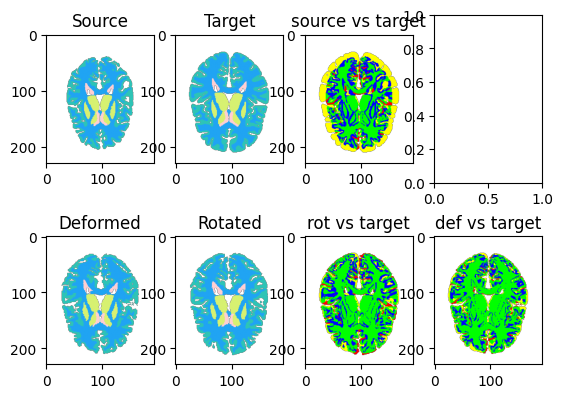

residual min 0.0 max 0.0


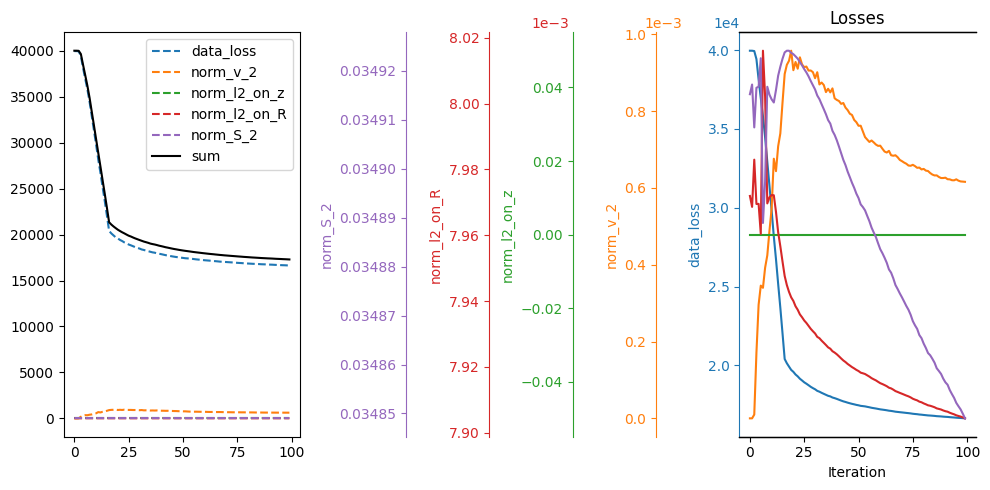

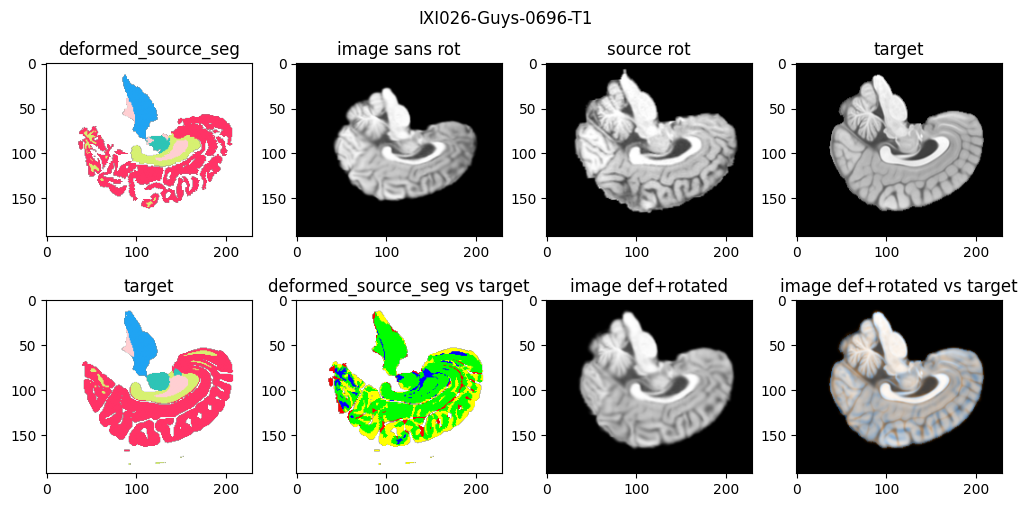

In [48]:

from datetime import datetime

sigma= [3, 5, 7]
sigma = [(s,)*3 for s in sigma]
kernelOperator = rk.Multi_scale_GaussianRKHS(sigma, normalized=False)

ic(momenta)

gamma = .3
rho = 1
cost_cst = 1e3

cost_field = 1000
cost_affine = 1
integration_steps = 10

best_momenta = {k : v.detach() for k, v in best_momenta.items()}

datacost = mt.Rotation_Ssd_Cost(target_b.to("cuda:0"), gamma=.3, start_gamma=1, n_at_gamma_reach= 15)

# datacost = mt.Rotation_Ssd_Cost(target_b.to("cuda:0"), gamma=0.5)
# datacost = mt.Rotation_MutualInformation_Cost(target_b, alpha=.5)
momenta = mt.prepare_momenta(
    source_b.shape,
    **best_momenta
)

mr = mt.rigid_along_metamorphosis(
  source_b.to("cuda:0"), target_b.to("cuda:0"), momenta_ini=momenta,
  kernelOperator= kernelOperator,
  rho = rho,
  data_term=datacost ,
  integration_steps = integration_steps,
  cost_cst=cost_cst,
  cost_affine_cst = cost_affine,
  cost_field_cst = cost_field,
  n_iter=100,
  save_gpu_memory=False,
  lbfgs_max_iter = 10,
  lbfgs_history_size = 30,
  # hamiltonian_integration=True
)

dices, _ =mr.compute_DICE(seg_source_b, seg_target_b, verbose=True)
dice = dices[0] | dices[1]

# file_save, path = mr.save(f"{subject_name}_rigid_along_lddmm",
#                     light_save=True,
#                     save_path = os.path.join(result_folder, "rigid_along_lddmm")
# )
now = datetime.now()
eit.log_metrics(
    db_path,
    patient_id=subject_name,
    method="rigid_along_LDDMM",
    metrics={'rigid_along_LDDMM ' + k: v for k,v in dice.items()},
    run_id= str(now) + ' at ' + location,
    step=0,
meta={"gpu":torch.cuda.get_device_name(),
                      "gamma" : gamma,
                      "cost_field": cost_field,
                      "rho" : rho,
                      "cost_cst" : cost_cst,
                        "sigma" : sigma,
                      "integration_steps" : integration_steps,
                      # "file": os.path.join(path, file_save)
                      }
)

mr.plot_cost()

src_rot = tb.imgDeform(mr.source, mr.mp.get_rigidor())
img_rot = tb.imgDeform(mr.mp.image, mr.mp.get_rigidor())

cmp_img = tb.imCmp(img_rot, mr.target, "compose")[0]

cs = tb.SegmentationComparator()
cmp_seg = cs(mr.source_seg_deformed, mr.target_segmentation)[0]

T, _, D, H, W = source.shape
print(f"residual min {mr.mp.residuals.min()} max {mr.mp.residuals.max()}")
# Choose a central slice for plotting
slice_index = W // 2 +3
fig, ax = plt.subplots(2,4,figsize = (10,5), constrained_layout=True)
ax[0,0].imshow(mr.source_seg_deformed[0,0,..., slice_index].detach().cpu(), cmap =tb.DLT_SEG_CMAP, vmin=0, vmax = 5)
ax[0,0].set_title(f'deformed_source_seg')
ax[0,1].imshow(mr.mp.image[0,0,..., slice_index].cpu(), cmap='gray')
ax[0,1].set_title(f'image sans rot')
ax[0,2].imshow(src_rot[0,0,..., slice_index], cmap='gray')
ax[0,2].set_title(f'source rot')
ax[0,3].imshow(mr.target[0,0,..., slice_index], cmap='gray')
ax[0,3].set_title(f'target')

ax[1,0].imshow(mr.target_segmentation[0,0,..., slice_index], cmap =tb.DLT_SEG_CMAP, vmin=0, vmax = 5)
ax[1,0].set_title('target')

ax[1,1].imshow(cmp_seg[..., slice_index, :])
ax[1,1].set_title(f'deformed_source_seg vs target')



ax[1,2].imshow(img_rot[0,0,..., slice_index], cmap='gray')
ax[1,2].set_title('image def+rotated')

ax[1,3].imshow(cmp_img[..., slice_index,:], cmap='gray')
ax[1,3].set_title('image def+rotated vs target')



fig.suptitle(subject_name)
plt.show()


In [55]:
print(dice)
print(f"dice: {dice['(all) dice average']:.3f}; dice affine only: {dice['(rotation only) dice average']:.3f}")

{'(rotation only) dice val 1.0': tensor(0.7234), '(rotation only) dice val 2.0': tensor(0.5532), '(rotation only) dice val 3.0': tensor(0.8569), '(rotation only) dice val 4.0': tensor(0.6761), '(rotation only) dice val 5.0': tensor(0.8902), '(rotation only) dice average': tensor(0.7400), '(all) dice val 1.0': tensor(0.8075), '(all) dice val 2.0': tensor(0.5746), '(all) dice val 3.0': tensor(0.8767), '(all) dice val 4.0': tensor(0.7352), '(all) dice val 5.0': tensor(0.8956), '(all) dice average': tensor(0.7779)}
dice: 0.778; dice affine only: 0.740


residual min 0.0 max 0.0


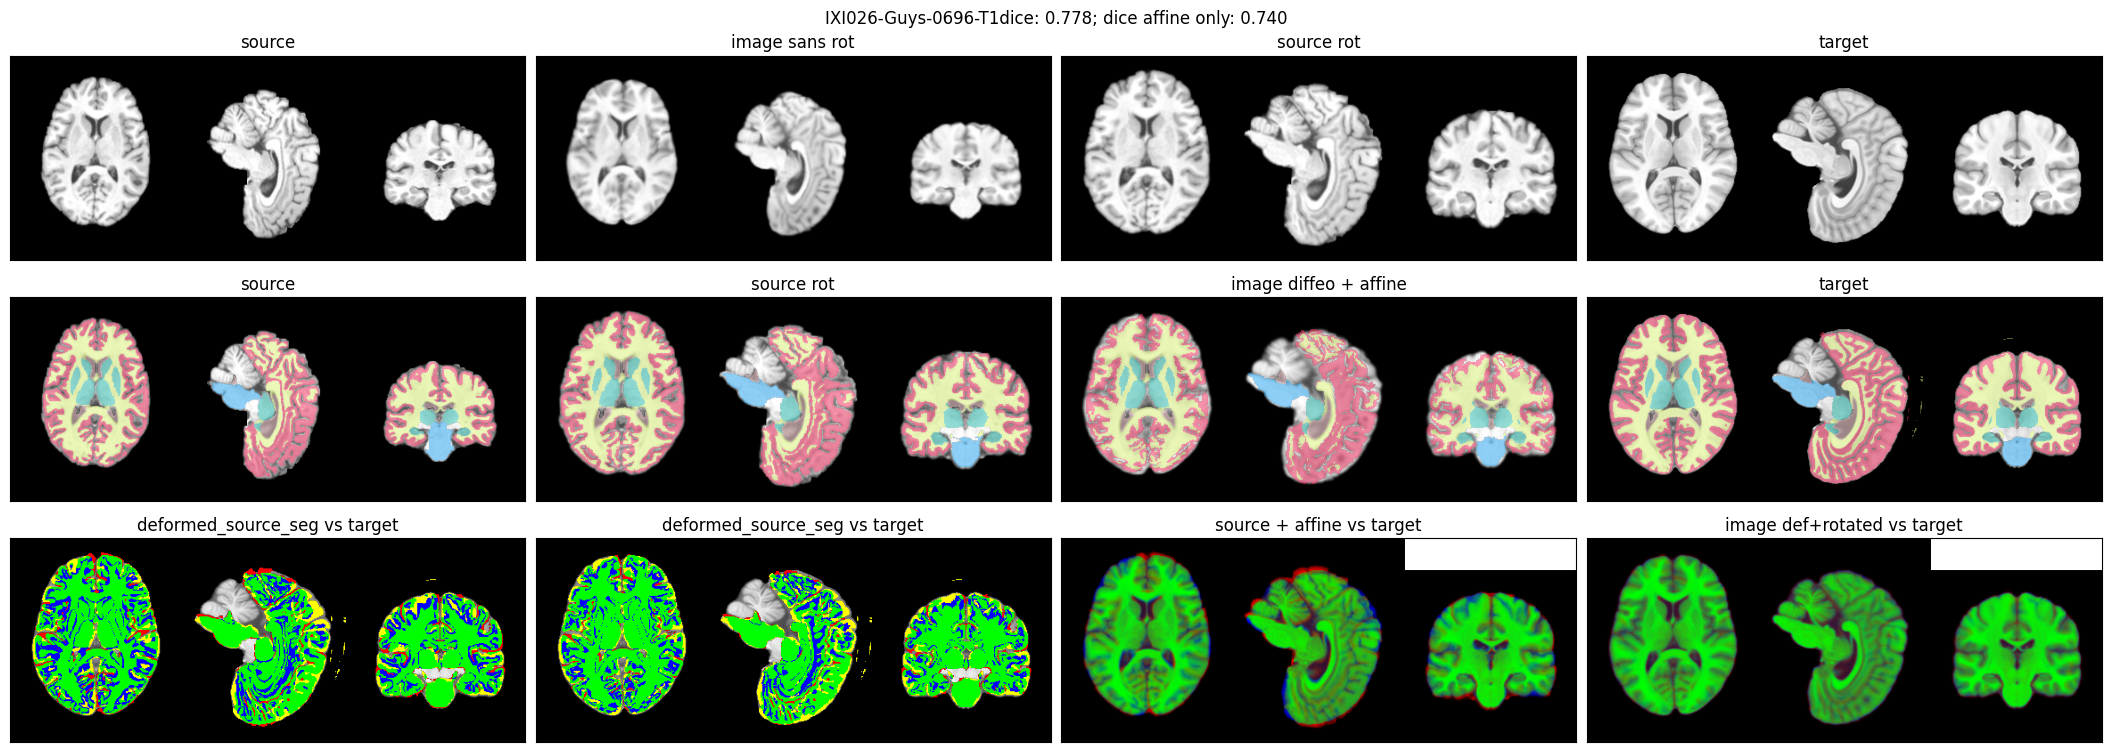

In [56]:
from demeter.constants import *
src_rot = tb.imgDeform(mr.source, mr.mp.get_rigidor())
img_rot = tb.imgDeform(mr.mp.image, mr.mp.get_rigidor())

cmp_src = tb.imCmp(src_rot, mr.target, "seg")[0]
cmp_img = tb.imCmp(img_rot, mr.target, "seg")[0]

cs = tb.SegmentationComparator()
cmp_seg_rot = cs(mr.source_seg_rotated, mr.target_segmentation)[0]
cmp_seg = cs(mr.source_seg_deformed, mr.target_segmentation)[0]



T, _, D, H, W = source.shape
print(f"residual min {mr.mp.residuals.min()} max {mr.mp.residuals.max()}")
# Choose a central slice for plotting
coord = (D//2, H//2, W//2+5)
def slc_plt(img):
  # if len(img.shape) == 5:
  #   return img[0,0,..., slice_index].detach().cpu()
  # elif len(img.shape) == 4:
  #   return img[..., slice_index,:].detach().cpu()
  if len(img.shape) == 5:
    return get_orthogonal_views_concatenated(img[0,0].detach().cpu(), coord)

  elif len(img.shape) == 4:
    return get_orthogonal_views_concatenated(img, coord)



fig, ax = plt.subplots(3,4,figsize = (14*1.5,5*1.5), constrained_layout=True)
ax[0,0].imshow(slc_plt(mr.source), cmap="gray", origin="lower")
ax[0,0].set_title(f'source')
ax[0,1].imshow(slc_plt(mr.mp.image), cmap='gray', origin="lower")
ax[0,1].set_title(f'image sans rot')
ax[0,2].imshow(slc_plt(src_rot), cmap='gray', origin="lower")
ax[0,2].set_title(f'source rot')
ax[0,3].imshow(slc_plt(mr.target), cmap='gray', origin="lower")
ax[0,3].set_title(f'target')

ax[1,0].imshow(slc_plt(mr.source), cmap="gray", origin="lower")
ax[1,0].imshow(slc_plt(mr.source_segmentation), cmap =tb.DLT_SEG_CMAP, vmin=0, vmax = 5, alpha =.5, origin="lower")
ax[1,0].set_title(f'source')
ax[1,1].imshow(slc_plt(src_rot), cmap='gray', origin="lower")
ax[1,1].imshow(slc_plt(mr.source_seg_rotated), cmap =tb.DLT_SEG_CMAP, vmin=0, vmax = 5, alpha =.5,  origin="lower")
ax[1,1].set_title(f'source rot')
ax[1,2].imshow(slc_plt(img_rot), cmap='gray', origin="lower")
ax[1,2].imshow(slc_plt(mr.source_seg_deformed), cmap =tb.DLT_SEG_CMAP, vmin=0, vmax = 5, alpha =.5,  origin="lower")
ax[1,2].set_title(f'image diffeo + affine')
ax[1,3].imshow(slc_plt(mr.target), cmap='gray', origin="lower")
ax[1,3].imshow(slc_plt(mr.target_segmentation), cmap =tb.DLT_SEG_CMAP, vmin=0, vmax = 5, alpha =.5,  origin="lower")
ax[1,3].set_title(f'target')

ax[2,0].imshow(slc_plt(mr.target), cmap='gray', origin="lower")
ax[2,0].imshow(slc_plt(cmp_seg_rot), origin="lower")
ax[2,0].set_title(f'deformed_source_seg vs target')
ax[2,1].imshow(slc_plt(mr.target), cmap='gray', origin="lower")
ax[2,1].imshow(slc_plt(cmp_seg), origin="lower")
ax[2,1].set_title(f'deformed_source_seg vs target')
ax[2,2].imshow(slc_plt(cmp_src), origin="lower")
ax[2,2].set_title(f'source + affine vs target')
ax[2,3].imshow(slc_plt(cmp_img), origin="lower")
ax[2,3].set_title('image def+rotated vs target')

set_ticks_off(ax)
# ax[1,2].imshow(img_rot[0,0,..., slice_index], cmap='gray')
# ax[1,2].set_title('image def+rotated')



dice_str = f"dice: {dice['(all) dice average']:.3f}; dice affine only: {dice['(rotation only) dice average']:.3f}"
fig.suptitle(subject_name + dice_str)
plt.show()
integration_plot(mr)



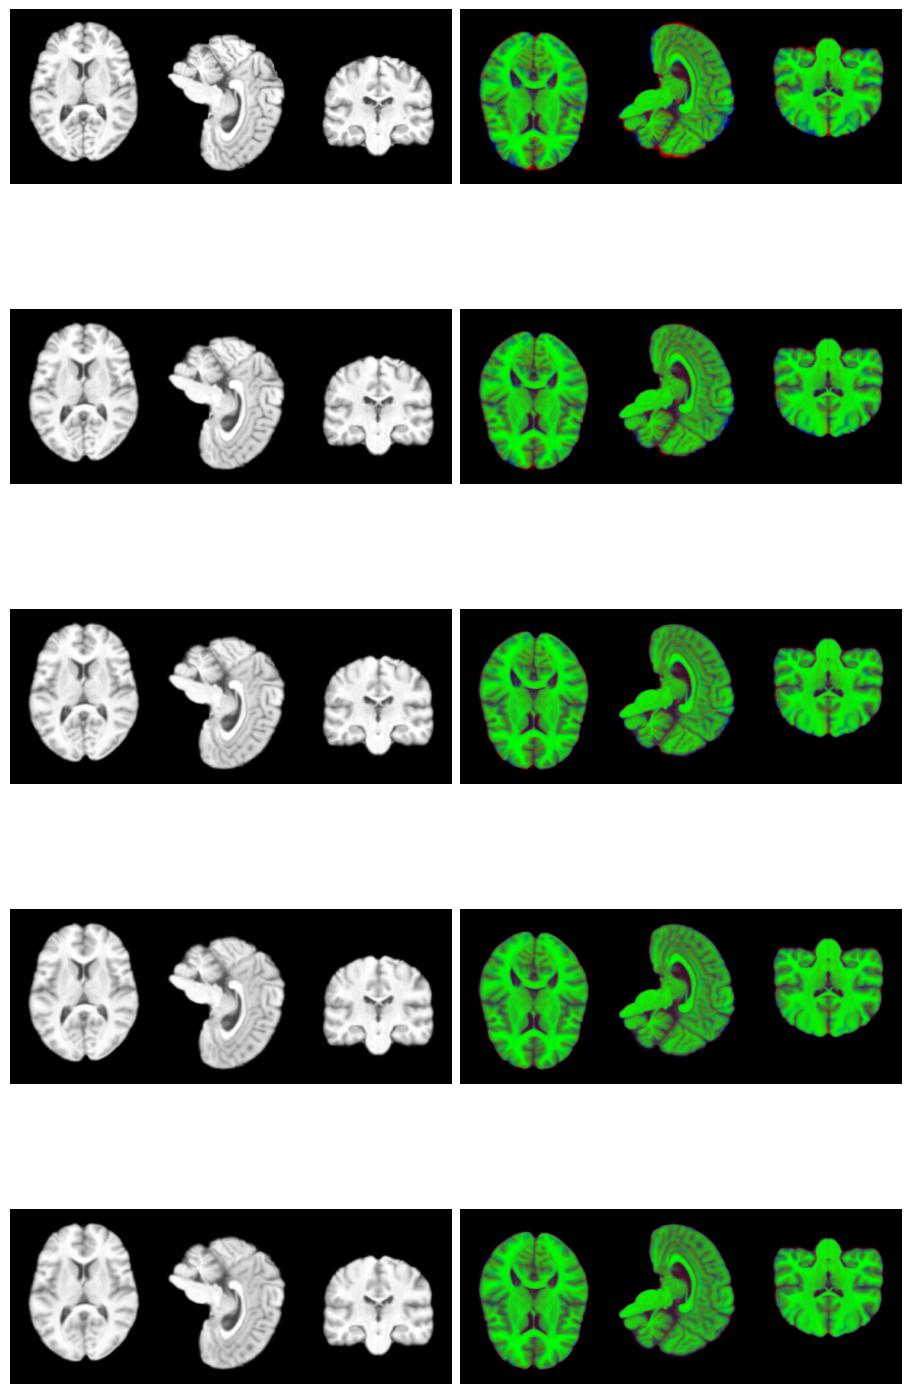

In [84]:
def integration_plot(mr):
    n_figs = 5
    plot_id = (
        torch.quantile(
            torch.arange(mr.mp.image_stock.shape[0], dtype=torch.float),
            torch.linspace(0, 1, n_figs),
        )
        .round()
        .int()
    )

    kw_image_args = dict(
        origin="lower",
        cmap="gray", #extent=[-1, 1, -1, 1],
        vmin=0, vmax=1
    )
    # v_abs_max = (mr.mp.residuals_stock.abs().max()).max()
    # v_abs_max = torch.quantile(mr.mp.momenta.abs(), 0.99)
    momentum =  mr.mp.momenta['momentum_I']
    v_abs_max = torch.quantile(momentum.abs(), 0.99)
    kw_residuals_args = dict(
        cmap="RdYlBu_r",
        extent=[-1, 1, -1, 1],
        origin="lower",
        vmin=-v_abs_max,
        vmax=v_abs_max,
    )
    color = "green"
    size_fig = 2
    # C = self.momentum_stock.shape[1]
    fig, ax = plt.subplots(
        n_figs,
        2,
        constrained_layout=True,
        figsize=(9,3 * n_figs ),
    )
    target = slc_plt(mr.target)
    for i, t in enumerate(plot_id):
        # deform = mr.mp.get_deformation(to_t = t + 1)

        # deform = mr.mp.get_rigid(deform)
        img = tb.imgDeform(
            mr.mp.image_stock[t, :, :, :][None],
            mr.mp.get_rigidor()
        )
        img = slc_plt(img)
        ax[i,0].imshow(img, **kw_image_args,)
        # ax[i,0].set_title("t = " + str((t / (mr.mp.n_step - 1)).item())[:3])
        ax[i,0].axis("off")

        img_target = tb.imCmp(img[None,None], target[None,None], "seg")[0]
        ax[i,1].imshow(img_target)
        ax[i,1].axis("off")




    set_ticks_off(ax)


cmp_seg : (193, 229, 193, 4)


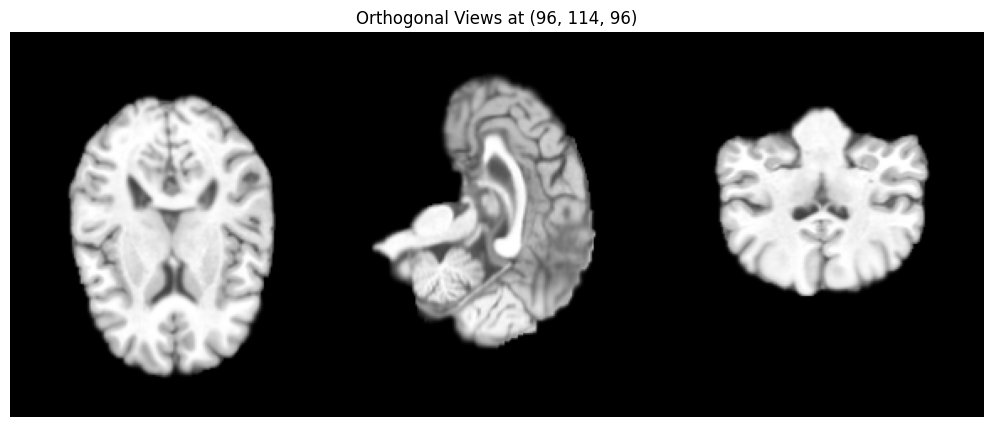

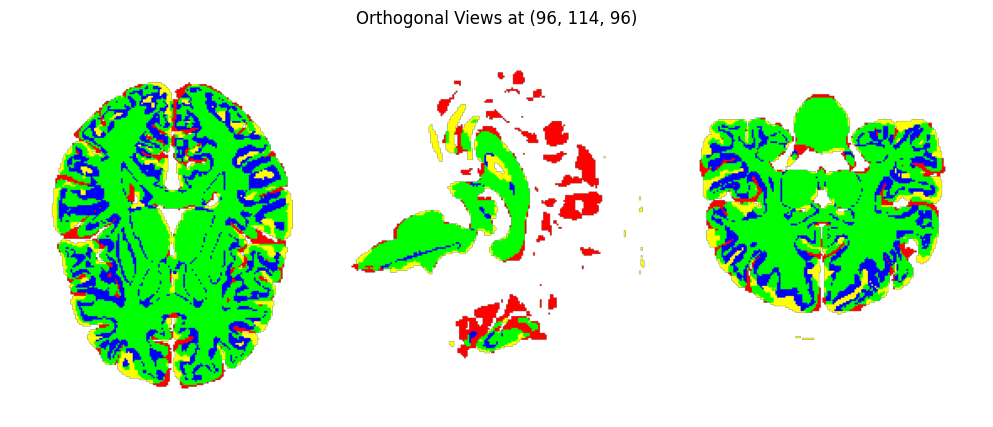

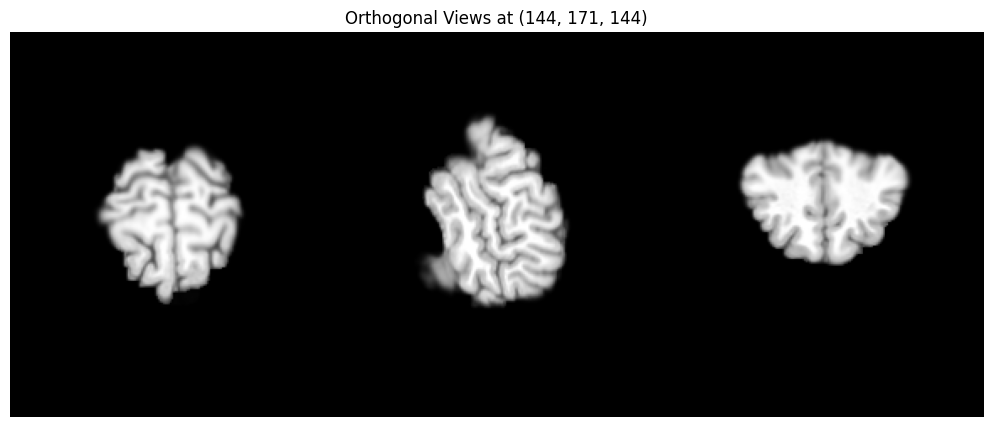

In [44]:
import torch
import numpy as np

def _to_tensor(img):
    return torch.from_numpy(img) if isinstance(img, np.ndarray) else img

def _ensure_hwc(t, num_channels):
    """
    Ensure slice is (H, W, C). If 2D and C>1, add channel axis.
    """
    if t.ndim == 2 and num_channels > 1:
        t = t.unsqueeze(-1)
    return t

def _pad_to_hw(hwc, H, W):
    """
    Pad a (H, W) or (H, W, C) tensor on height then width.
    Uses (C, H, W) to ensure we pad H and W (not the channel).
    """
    if hwc.ndim == 2:
        chw = hwc.unsqueeze(0)  # (1, H, W)
        C_axis = False
    elif hwc.ndim == 3:
        chw = hwc.permute(2, 0, 1)  # (C, H, W)
        C_axis = True
    else:
        raise ValueError("Expected (H, W) or (H, W, C) slice.")

    dH = max(0, H - chw.shape[1])
    dW = max(0, W - chw.shape[2])
    chw = torch.nn.functional.pad(chw, (0, dW, 0, dH), value=0)  # pad W then H

    if C_axis:
        return chw.permute(1, 2, 0)  # (H, W, C)
    else:
        return chw.squeeze(0)        # (H, W)

def get_orthogonal_views_concatenated(image, coords):
    """
    Returns axial, sagittal, and coronal views at (z, y, x) concatenated horizontally.
    Accepts [D, H, W] or [D, H, W, C] (C<=4). For color, keeps channels.
    """
    image = _to_tensor(image)

    # Normalize rank & channels
    if image.ndim == 3:
        # [D, H, W] -> treat as grayscale (C=1)
        image_to_slice = image.unsqueeze(-1)  # [D, H, W, 1]
        num_channels = 1
    elif image.ndim == 4:
        if image.shape[-1] <= 4:
            # [D, H, W, C]
            image_to_slice = image
            num_channels = image.shape[-1]
        else:
            raise ValueError("Expected [D,H,W] or [D,H,W,C] with C<=4.")
    else:
        raise ValueError("Input must be 3D or 4D.")

    D, H, W, C = image_to_slice.shape
    z, y, x = coords
    z = int(max(0, min(z, D - 1)))
    y = int(max(0, min(y, H - 1)))
    x = int(max(0, min(x, W - 1)))

    # Extract slices
    # Axial: [H, W, C]
    axial = image_to_slice[z, :, :, :].detach().cpu()
    axial = axial.squeeze(-1) if num_channels == 1 else axial
    axial = _ensure_hwc(axial, num_channels)

    # Sagittal: start [D, H, C] -> rotate 90° over (D,H) to get [H, D, C] ≡ (H, W_sag, C)
    sagittal = image_to_slice[:, :, x, :].detach().cpu()
    sagittal = sagittal.squeeze(-1) if num_channels == 1 else sagittal
    if sagittal.ndim == 2:  # (D, H) for grayscale
        sagittal = torch.rot90(sagittal, 1, [0, 1])              # -> (H, D)
    else:                    # (D, H, C)
        sagittal = torch.rot90(sagittal, 1, [0, 1])              # -> (H, D, C)
    sagittal = _ensure_hwc(sagittal, num_channels)

    # Coronal: [D, W, C] -> keep as (H_cor=W? nope) we keep height=D, width=W
    coronal = image_to_slice[:, y, :, :].detach().cpu()
    coronal = coronal.squeeze(-1) if num_channels == 1 else coronal
    coronal = _ensure_hwc(coronal, num_channels)  # currently (D, W) or (D, W, C); treat D as height

    # Target sizes
    ha, wa = axial.shape[:2]
    hs, ws = sagittal.shape[:2]
    hc, wc = coronal.shape[:2]
    Hmax = max(ha, hs, hc)
    Wmax = max(wa, ws, wc)

    # Pad to common (Hmax, Wmax)
    axial_p     = _pad_to_hw(axial,    Hmax, Wmax)
    sagittal_p  = _pad_to_hw(sagittal, Hmax, Wmax)
    coronal_p   = _pad_to_hw(coronal,  Hmax, Wmax)

    # Concat along width
    if num_channels == 1:
        # slices are (H, W) → stack into (H, 3*W)
        concatenated = torch.cat((axial_p, sagittal_p, coronal_p), dim=1)
    else:
        # slices are (H, W, C) → concat along W
        concatenated = torch.cat((axial_p, sagittal_p, coronal_p), dim=1)

    return concatenated


# Example usage (assuming 'mr.mp.image' is your 5D image tensor [T, C, D, H, W])
# Select the first time step and channel to get a 3D tensor [D, H, W]
image_3d_to_plot = mr.mp.image[0, 0, :, :, :]

# Replace (z, y, x) with your desired coordinates
coords_to_plot_1 = (image_3d_to_plot.shape[0] // 2, image_3d_to_plot.shape[1] // 2, image_3d_to_plot.shape[2] // 2)
concatenated_img_1 = get_orthogonal_views_concatenated(image_3d_to_plot, coords_to_plot_1)

cs = tb.SegmentationComparator()
cmp_seg = cs(mr.source_seg_deformed, mr.target_segmentation)[0]
print("cmp_seg :",cmp_seg.shape)
concatenated_img_2 = get_orthogonal_views_concatenated(cmp_seg, coords_to_plot_1)

coords_to_plot_3 = (image_3d_to_plot.shape[0] // 4 * 3, image_3d_to_plot.shape[1] // 4 * 3, image_3d_to_plot.shape[2] // 4 * 3)
concatenated_img_3 = get_orthogonal_views_concatenated(image_3d_to_plot, coords_to_plot_3)


# Now you can plot the returned concatenated images as needed
plt.figure(figsize=(15, 5))
plt.imshow(concatenated_img_1, cmap='gray')
plt.title(f'Orthogonal Views at {coords_to_plot_1}')
plt.axis('off')
plt.show()

plt.figure(figsize=(15, 5))
plt.imshow(concatenated_img_2, cmap='gray')
plt.title(f'Orthogonal Views at {coords_to_plot_1}')
plt.axis('off')
plt.show()

plt.figure(figsize=(15, 5))
plt.imshow(concatenated_img_3, cmap='gray')
plt.title(f'Orthogonal Views at {coords_to_plot_3}')
plt.axis('off')
plt.show()

In [ ]:

mr.save(f"{name}_ixibrain_rigidscalingLDDMM_colab",
        # save_path="/content/drive/MyDrive/demeter_data/demeter_optim/"
        )
